## 1. Imports


In [1]:
import sys
sys.path.append('../')
from visualizations import impact_bar_plots
from evaluation import *
from testing import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data_path = '../data/results/test_1/'
folders= ['dt','gnb','lgr','gbt']
folders = ['dt']

## 2. DI_plots and CSV

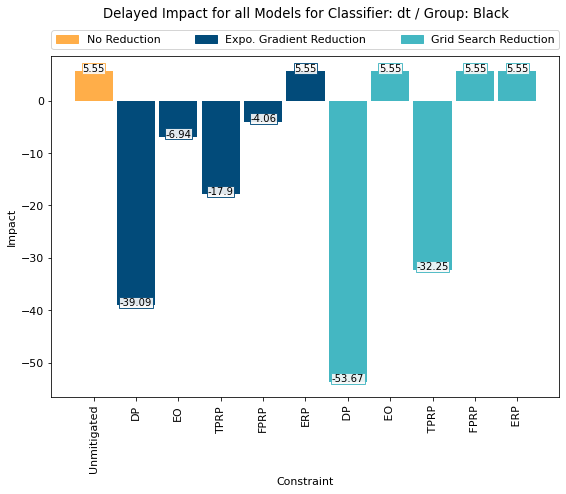

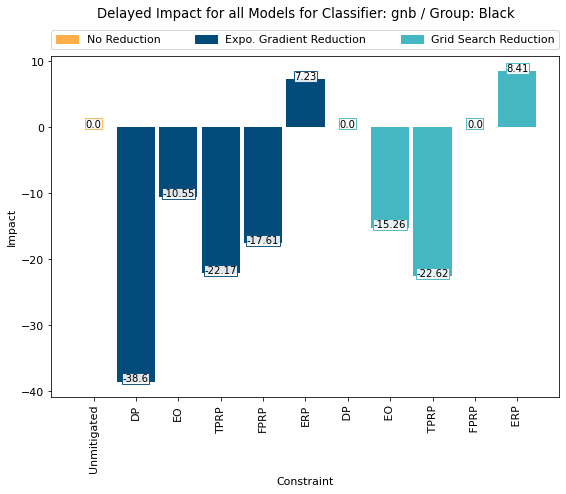

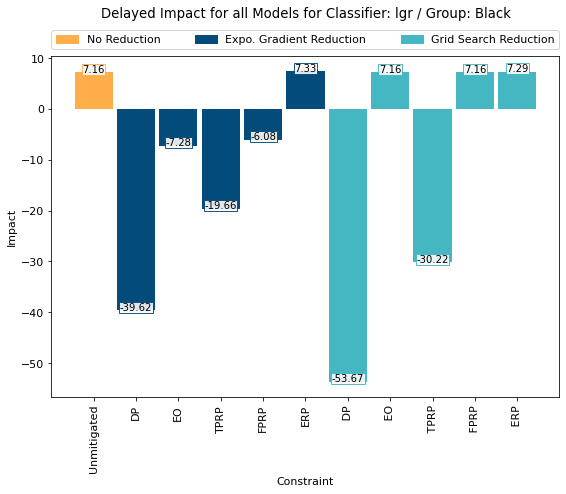

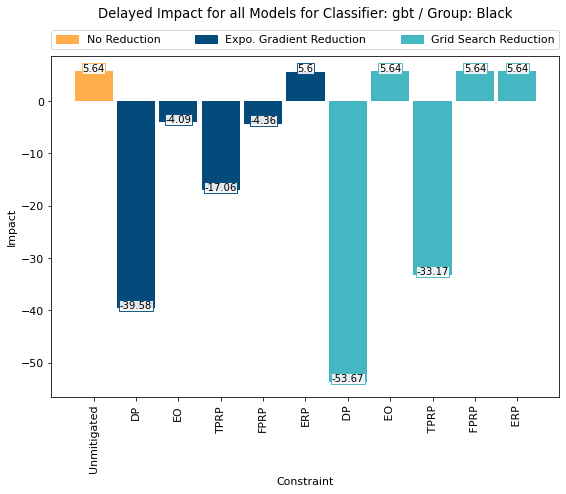

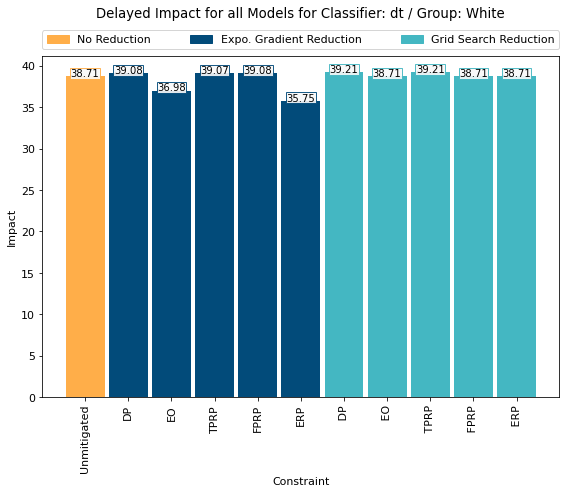

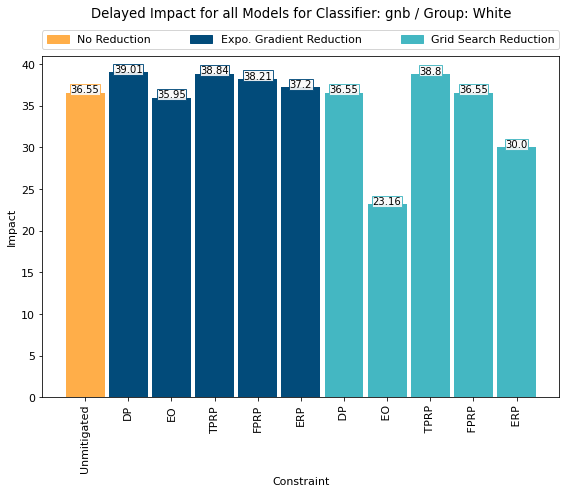

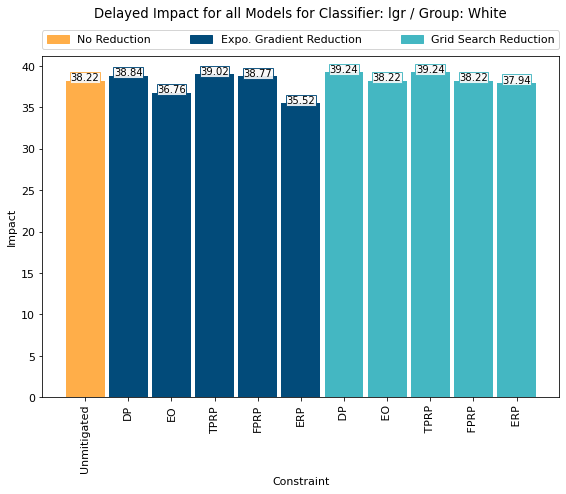

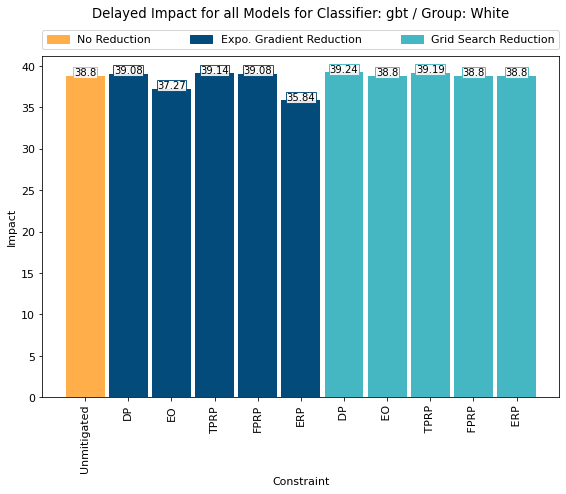

In [3]:
impact_bar_plots(data_path = '../data/results/test_5/',b_or_w = 'Black',folders= ['dt','gnb','lgr','gbt'])
impact_bar_plots(data_path = '../data/results/test_5/',b_or_w = 'White',folders= ['dt','gnb','lgr','gbt'])

In [ ]:
impact_csvs(data_path= '../data/results/test_4/',b_or_w = 'black', folders= ['dt','gnb','lgr','gbt'])
impact_csvs(data_path= '../data/results/test_4/',b_or_w = 'white', folders= ['dt','gnb','lgr','gbt'])

## 3. FP/TP/TN/FN Ratios

In [ ]:
types_ratios_csv(data_path = '../data/results/test_4/',folders= ['dt','lgr','gbt','gnb'])

## 4. Score Distributions

Loading All Scores and splitting it into multiple dataframes

In [ ]:
classifier_dfs = {}
dfs_b = {}
dfs_w = {}
dfs_eg = {}
dfs_gs = {}
for f in folders:
    path = f'{data_path}{f}/{f}_all_scores.csv'
    df = pd.read_csv(path)
    df = df.reset_index(drop=True)
    

    df_black = df.filter(like='B')
    df_white = df.filter(like='W')
    df_eg = pd.concat([df.iloc[:,:4],df.filter(like='eg')],axis=1)
    df_gs = pd.concat([df.iloc[:,:4],df.filter(like='gs')],axis=1)
    
    classifier_dfs[f] = df
    dfs_b[f] = df_black
    dfs_w[f] = df_white
    dfs_eg[f] = df_eg
    dfs_gs[f] = df_gs

Checking if normal distributions:

In [ ]:
for c,df in classifier_dfs.items():
    for col in df:
        print(col)
        data=df[col].dropna(axis=0)
        print(stats.kstest(data, "norm"))

In [ ]:


for c,df in classifier_dfs.items():
    fig,axes = plt.subplots(nrows= 5)
    
    for i in range(5):
        axes[i] = plt.plot(df.iloc[:,i].value_counts().sort_index())
        plt.tight_layout()
        plt.show()
        